# **Grupo 5**
Pedro Paulo Costa Pereira - A88062

Tiago André Oliveira Leite - A91693

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, visualize_transition
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def execute_circuit(qc, shots=1024, decimal=False):
    
    #define backend
    device = Aer.get_backend('qasm_simulator')
    #get counts
    counts = device.run(qc, shots=shots).result().get_counts()
    
    if decimal:
        counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
    else:
        counts = dict((a[::-1],b) for (a,b) in counts.items())

    return counts

In [14]:
def init(n,a):
    qr = QuantumRegister(n)
    ancilla = QuantumRegister(a)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr,ancilla,cr)
    
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    qc.barrier() 
    
    return qc, qr, ancilla, cr

In [25]:
def oracle(qr, ancilla):
    qc = QuantumCircuit(qr,ancilla)
    qc.x(qr)
    qc.ccx(qr[0],qr[1],ancilla)
    qc.x(qr)
    qc.x(ancilla)
    qc.barrier()
    return qc

In [26]:
def diffusion_operator(qr, ancilla):

    qc = QuantumCircuit(qr,ancilla)

    #hadamards para passar |psi_0> para |0>
    qc.h(qr)

    #alpha - inverte apenas o |0>
    qc.x(qr)
    qc.cz(qr[0],qr[1])
    qc.x(qr)

    #hadamards para passar |0> para |psi_0> 
    qc.h(qr)
    
    qc.barrier()
    
    return qc 

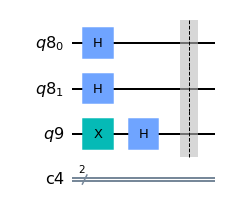

In [27]:
qc,qr, ancilla, cr = init(2,1)
qc.draw("mpl")

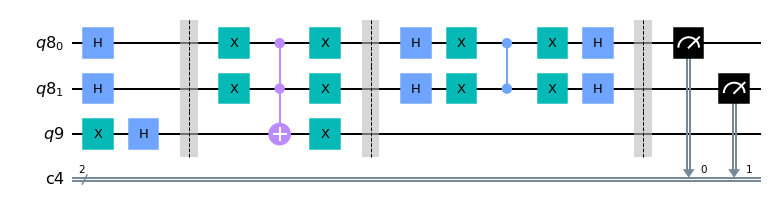

In [28]:
n_qubits = 2
elements = 2**n_qubits

iterations= int(np.floor(np.pi/4 * np.sqrt(elements)))

for j in range(iterations):
    qc = qc.compose(oracle(qr,ancilla))
    qc = qc.compose(diffusion_operator(qr,ancilla))

qc.measure(qr,cr)
qc.draw(output="mpl")

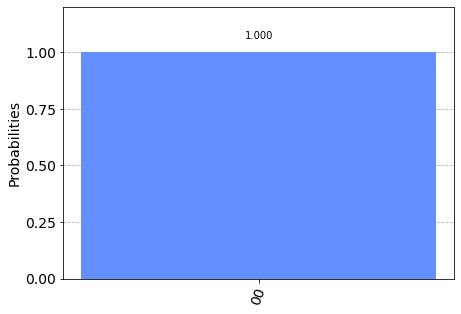

In [30]:
counts = execute_circuit(qc)
plot_histogram(counts)